In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-darkgrid')
import warnings
warnings.filterwarnings('ignore')

In [3]:
train = pd.read_csv('/Users/hernando/Desktop/datamining1/assign2/2nd-assignment-dmt-2020/training_set_VU_DM.csv',sep=',')
test = pd.read_csv('/Users/hernando/Desktop/datamining1/assign2/2nd-assignment-dmt-2020/test_set_VU_DM.csv',sep=',')


In [4]:
all_data = pd.concat((train,test)).reset_index(drop=True)

In [5]:
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data

,Missing Ratio
gross_bookings_usd,98.604592
comp1_rate_percent_diff,98.135554
comp6_rate_percent_diff,98.050805
comp1_rate,97.622331
comp1_inv,97.434512
comp4_rate_percent_diff,97.335899
comp7_rate_percent_diff,97.198516
comp6_rate,95.135008
visitor_hist_starrating,94.905012
visitor_hist_adr_usd,94.881669


Text(0.5, 1.0, 'Percent missing data by feature')

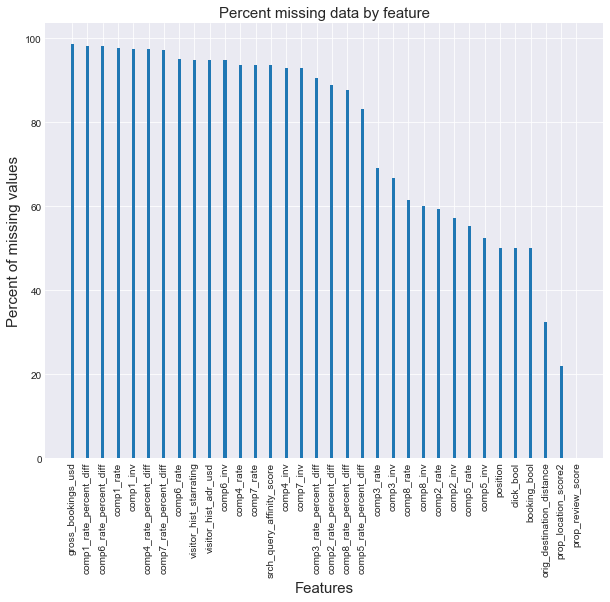

In [6]:
plt.figure(figsize=(10, 8))
plt.xticks(rotation='90')
plt.bar(x=all_data_na.index, height=all_data_na,width=0.2)
# missing_data.plot(kind='bar')
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

In [7]:
df_book = train.loc[train['booking_bool']==1]
df_click =train.loc[train["click_bool"]==1]

df_book=df_book[["srch_id", "position"]]
df_click=df_click[["srch_id", "position"]]
position_count= df_book.groupby("position").count()
position_count_c= df_click.groupby("position").count()

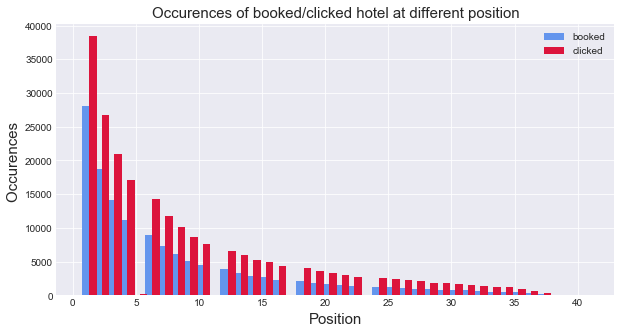

In [8]:
xaxes=[i for i in range(1,41)]
fig, ax = plt.subplots(figsize=(10,5))
width = 0.6
ax.bar(xaxes,position_count.iloc[:,0], width, color="#6495ED", label="booked")
xaxes=[i+width for i in xaxes]
ax.bar(xaxes,position_count_c.iloc[:,0], width, color="#DC143C",label="clicked")
plt.title("Occurences of booked/clicked hotel at different position",size=15)
plt.xlabel("Position",size=15)
plt.ylabel("Occurences ",size=15)
plt.legend()

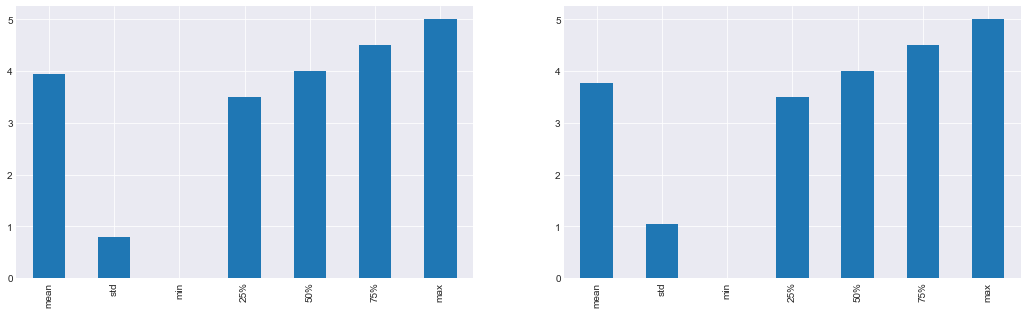

In [9]:
fig, ax = plt.subplots(figsize=(18,5))
plt.subplot(1,2,1)
train['prop_review_score'][train['booking_bool']==1].describe()[1:].plot(kind='bar')
plt.subplot(1,2,2)
train['prop_review_score'].describe()[1:].plot(kind='bar')